In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

from scipy.stats import kstest, spearmanr, mannwhitneyu, ttest_ind, levene, kruskal, pearsonr

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
data = pd.read_csv('ready_data.csv',index_col=0)

In [19]:
data.head()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Devyatkino,Grazhdanskii prospekt,Akademicheskaya,...,Ploshchad Aleksandra Nevskogo-1,Elizarovskaia,Lomonosovskaia,Proletarskaia,Obukhovo,Rybackoe,metro_1km,metro_5km,metro_10km,parkings_1km
0,311480.0,131.63,0,1,2,30.082621,59.724677,42.18,39.32,36.65,...,34.54,38.56,40.41,43.51,42.04,46.67,0,0,0,47.0
1,254997.0,145.10,0,1,5,30.316138,59.911854,16.08,13.22,10.44,...,7.71,12.00,14.10,17.35,16.16,21.02,6,33,56,55.0
2,353742.0,73.50,0,1,7,30.301127,59.912368,17.50,14.62,11.85,...,9.38,13.67,15.75,19.00,17.79,22.65,1,27,55,55.0
3,190000.0,33.90,0,1,9,30.449978,59.956836,5.93,5.97,6.88,...,7.46,4.74,5.08,6.30,6.92,9.97,0,5,21,15.0
4,166667.0,89.40,0,1,5,30.325543,59.926372,14.80,11.94,9.16,...,6.64,11.05,13.21,16.49,15.37,20.24,8,34,57,26.0


In [20]:
data.columns

Index(['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Devyatkino', 'Grazhdanskii prospekt',
       'Akademicheskaya', 'Politekhnicheskaya', 'Ploshchad Muzhestva',
       'Lesnaia', 'Vyborgskaia', 'Ploshchad Lenina', 'Chernyshevskaia',
       'Ploshchad Vosstaniia', 'Vladimirskaia', 'Pushkinskaia',
       'Tekhnologicheskii institut-2', 'Baltiiskaia', 'Narvskaia',
       'Kirovskii zavod', 'Avtovo', 'Leninskii prospekt', 'Prospekt Veteranov',
       'Parnas', 'Prospekt Prosviashcheniia', 'Ozerki', 'Udelnaia',
       'Pionerskaia', 'Chernaia Rechka', 'Petropavlovskaia', 'Gorkovskaia',
       'Nevskii prospekt', 'Sennaia ploshchad', 'Tekhnologicheskii institut-1',
       'Frunzenskaia', 'Moskovskie vorota', 'Elektrosila', 'Park Pobedy',
       'Moskovskaia', 'Zvezdnaia', 'Kupchino', 'Spasskaia', 'Dostoevskaia',
       'Ligovskii prospekt', 'Ploshchad Aleksandra Nevskogo-2',
       'Novocherkasskaia', 'Ladozhskaia', 'Prospekt Bolshevik

In [21]:
data = data[['price_per_square', 'squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude','Nevskii prospekt','metro_1km','parkings_1km']]

In [22]:
data.describe()

,price_per_square,squares,free,current_floor,max_floor,latitude,longitude,Nevskii prospekt,metro_1km,parkings_1km
count,1.066000e+03,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000,1066.000000
mean,4.209756e+05,129.836510,0.076923,1.227017,8.960600,30.314739,59.934663,8.566876,1.025328,44.695122
std,2.138065e+06,95.730417,0.266594,0.897080,7.755558,0.101542,0.073656,8.340676,1.602907,21.438895
min,1.700000e+02,1.000000,0.000000,1.000000,1.000000,29.767554,59.707956,0.210000,0.000000,0.000000
25%,1.741100e+05,66.217500,0.000000,1.000000,3.000000,30.276738,59.898076,3.380000,0.000000,27.000000
50%,2.466440e+05,99.920000,0.000000,1.000000,6.000000,30.322282,59.936206,6.775000,0.000000,42.000000
75%,3.286675e+05,165.362500,0.000000,1.000000,13.000000,30.365453,59.985804,10.990000,1.000000,59.000000
max,4.300000e+07,530.000000,1.000000,15.000000,28.000000,30.642972,60.110679,62.240000,8.000000,120.000000


In [23]:
data = data[data['price_per_square']>= 30000.0]

In [24]:
Q1 = data['price_per_square'].quantile(0.05)
Q3 = data['price_per_square'].quantile(0.95)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['price_per_square'] >= lower_bound) & (data['price_per_square'] <= upper_bound)]

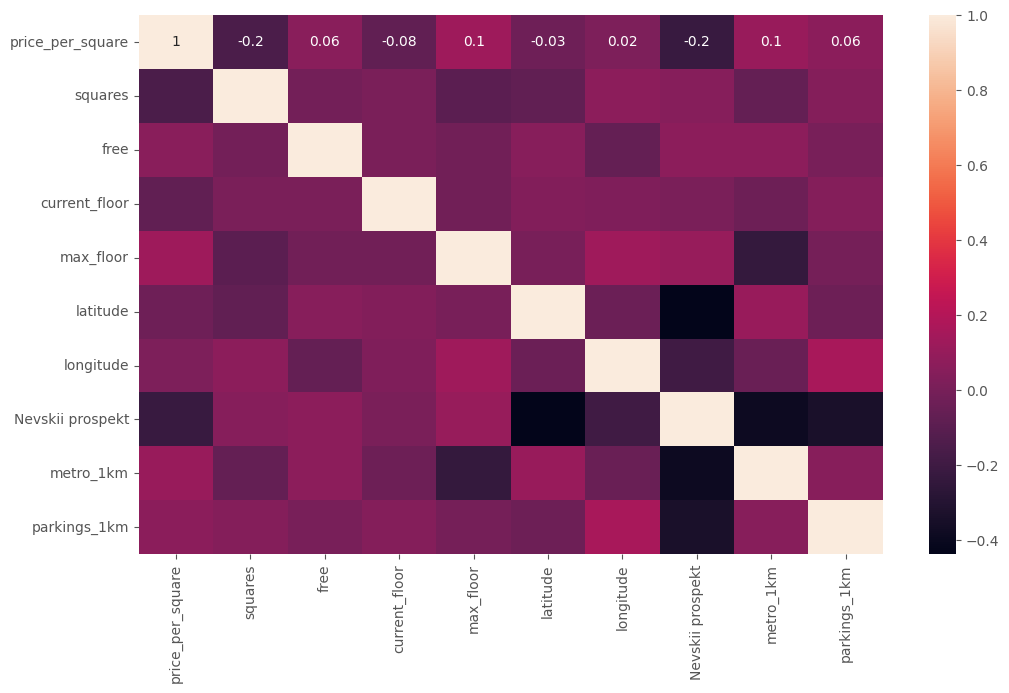

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(data = data.corr(),annot=True,fmt = '.1g')
plt.show()

In [26]:
for i in data.columns:
    print(f"{i}:{pearsonr(data['price_per_square'], data[i])}")

price_per_square:PearsonRResult(statistic=0.9999999999999996, pvalue=0.0)
squares:PearsonRResult(statistic=-0.15448236275860827, pvalue=5.090914446010645e-07)
free:PearsonRResult(statistic=0.060625940171711426, pvalue=0.04986066988225789)
current_floor:PearsonRResult(statistic=-0.07784318968456302, pvalue=0.011748264945343792)
max_floor:PearsonRResult(statistic=0.12616300727820107, pvalue=4.243682158987548e-05)
latitude:PearsonRResult(statistic=-0.030569418415215738, pvalue=0.32305684477167457)
longitude:PearsonRResult(statistic=0.01884619872041988, pvalue=0.5424321425258505)
Nevskii prospekt:PearsonRResult(statistic=-0.22240027440210783, pvalue=3.361942508387044e-13)
metro_1km:PearsonRResult(statistic=0.11031203049524056, pvalue=0.00034880736972106493)
parkings_1km:PearsonRResult(statistic=0.06407176142234329, pvalue=0.038186441457022664)


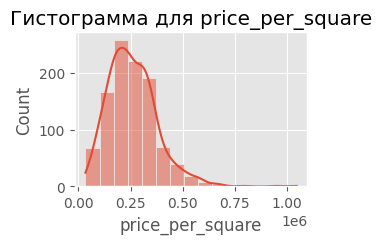

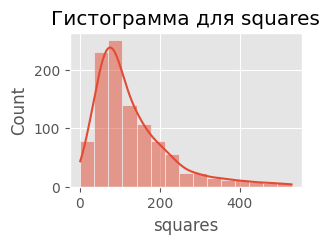

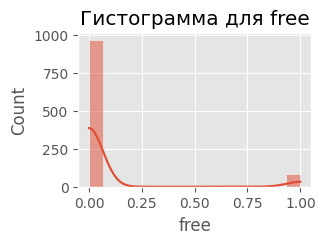

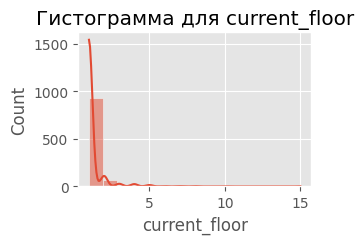

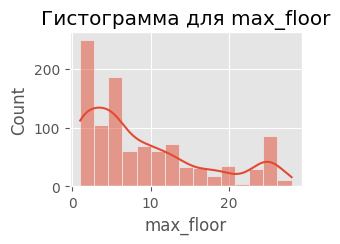

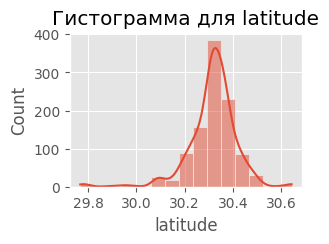

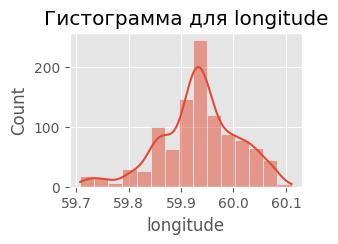

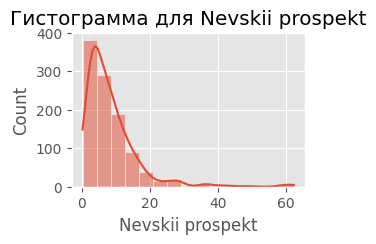

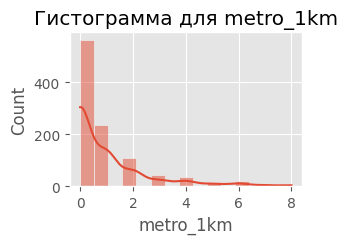

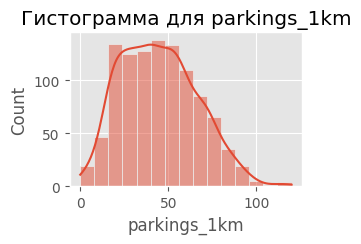

In [27]:
for column in data.columns:
    plt.figure(figsize=(3,2))
    sns.histplot(data[column], kde=True,bins = 15)
    plt.title(f"Гистограмма для {column}")
    plt.show()

# Стандартное масштабирование

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error 
import statsmodels.api as sm

In [30]:
df_1 = data.copy()

# Определяем зависимые и не зависимые переменные
X = df_1[['squares', 'free', 'current_floor', 'max_floor',
       'latitude', 'longitude', 'Nevskii prospekt', 'metro_1km',
       'parkings_1km']]
y = df_1['price_per_square']

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем модель
model_1 = LinearRegression()
model_1.fit(X_scaled, y)

# Получаем коэфф. / веса параметров
coefficients = model_1.coef_
print(coefficients,'\n')

# Свободный коэф.
intercept = model_1.intercept_
print(intercept)

[-15425.81357878  11095.22047678  -7064.50333661  19328.04796374
 -23955.3463304   -6405.77804665 -41102.00182849   2097.65352345
  -5169.32719656] 

259579.21680993345


In [31]:
X = sm.add_constant(np.array(X_scaled))
est = sm.OLS(y, X)
result = est.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       price_per_square   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     17.57
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           2.67e-27
Time:                        13:55:45   Log-Likelihood:                -13644.
No. Observations:                1047   AIC:                         2.731e+04
Df Residuals:                    1037   BIC:                         2.736e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.596e+05   3431.358     75.649      0.0

In [32]:
predictions = result.predict(X)
rmse = np.sqrt(mean_squared_error(y, predictions))
print(rmse)
print(mean_absolute_error(y, predictions))
print(mean_absolute_percentage_error(y, predictions))

110498.23877128595
82516.19412885638
0.43614042375357115


# При разделении на 2 выборки

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 999)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [35]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

# Получаем коэфф. / веса параметров
coefficients = model_2.coef_
print(coefficients,'\n')

# Свободный коэф.
intercept = model_2.intercept_
print(intercept)

[     0.         -18873.63229315  12250.8115247   -7441.47227438
  17104.74450251 -28845.53963049  -8726.96943952 -47287.46984912
   6001.93400645  -8259.17295749] 

259029.70818023794


In [36]:
est = sm.OLS(y_train, sm.add_constant(X_train_scaled))
result = est.fit()

# Делаем предсказания на тестовых данных
X_test_const = sm.add_constant(X_test_scaled)
predictions = result.predict(X_test_const)

# Вычисляем метрики
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 83654.84718566308
Mean Squared Error (MSE): 12700513684.712875
Mean Absolute Percentage Error (MAPE): 46.126604660191475


In [37]:
# Выводим формулу регрессии
coefficients = result.params
variable_names = data.columns
equation = "y = {:.2f}".format(coefficients[0])
for i in range(1, len(coefficients)):
    equation += " + {:.2f} * {}".format(coefficients[i], variable_names[i-1])
print("Regression Equation:")
print(equation)


Regression Equation:
y = 259396.54 + 0.00 * price_per_square + -19448.37 * squares + 12186.59 * free + -6416.27 * current_floor + 17277.67 * max_floor + -26878.64 * latitude + -8705.72 * longitude + -41810.29 * Nevskii prospekt + 5596.35 * metro_1km + -8179.64 * parkings_1km


### Как итог - регрессия плохо демонстрирует себя с координатными данными, в особенности видно по величине ошибок.

# Lasso

In [38]:
lasso = Lasso()

lasso.fit(X_train_scaled, y_train)

y_approx_1 = lasso.predict(X_train_scaled)
y_pred_1 = lasso.predict(X_test_scaled)

In [39]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_1)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

mse_approx_1 = mean_squared_error(y_train, y_approx_1)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_1)
print('R^2 on train: {:.2}'.format(r2_approx_1),'\n')

mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_1)
print('MAPE on test: {:.2%}'.format(mape_test_1))


mse_test_1 = mean_squared_error(y_test, y_pred_1)
print('MSE on test: {:.2f}'.format(mse_test_1))


r2_approx_1 = r2_score(y_test, y_pred_1)
print('R^2 on test: {:.2}'.format(r2_approx_1))

MAPE on train: 41.25%
MSE on train: 11791495685.81
R^2 on train: 0.17 

MAPE on test: 46.13%
MSE on test: 12700455943.98
R^2 on test: 0.094


# Ridge

In [40]:
ridge = Ridge()

ridge.fit(X_train_scaled, y_train)

y_approx_3 = ridge.predict(X_train_scaled)
y_pred_3 = ridge.predict(X_test_scaled)

In [41]:
mape_approx_1 = mean_absolute_percentage_error(y_train, y_approx_3)
print('MAPE on train: {:.2%}'.format(mape_approx_1))

mse_approx_1 = mean_squared_error(y_train, y_approx_3)
print('MSE on train: {:.2f}'.format(mse_approx_1))

r2_approx_1 = r2_score(y_train, y_approx_3)
print('R^2 on train: {:.2}'.format(r2_approx_1),'\n')

mape_test_1 = mean_absolute_percentage_error(y_test, y_pred_3)
print('MAPE on test: {:.2%}'.format(mape_test_1))


mse_test_1 = mean_squared_error(y_test, y_pred_3)
print('MSE on test: {:.2f}'.format(mse_test_1))


r2_approx_1 = r2_score(y_test, y_pred_3)
print('R^2 on test: {:.2}'.format(r2_approx_1))

MAPE on train: 41.24%
MSE on train: 11791521565.46
R^2 on train: 0.17 

MAPE on test: 46.13%
MSE on test: 12698984135.66
R^2 on test: 0.094


# Валидация

## Лассо

In [42]:
cv = KFold(n_splits=4, shuffle=False, random_state=None)

In [43]:
grid = {'alpha': np.linspace(0.1, 1, 20)}

In [44]:
gs_lasso = GridSearchCV(Lasso(), 
                  grid, 
                  n_jobs=-1,
                  cv=cv) 

In [45]:
gs_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [46]:
a = gs_lasso.best_params_['alpha']
print(f'best alpha = {a}')

best alpha = 1.0


In [47]:
mape_train_best_lasso = mean_absolute_percentage_error(y_train, gs_lasso.best_estimator_.predict(X_train_scaled))
mse_train_best_lasso = mean_squared_error(y_train, gs_lasso.best_estimator_.predict(X_train_scaled))
mae_train_best_lasso = mean_absolute_error(y_train, gs_lasso.best_estimator_.predict(X_train_scaled))

mape_test_best_lasso = mean_absolute_percentage_error(y_test, gs_lasso.best_estimator_.predict(X_test_scaled))
mse_test_best_lasso = mean_squared_error(y_test, gs_lasso.best_estimator_.predict(X_test_scaled))
mae_test_best_lasso = mean_absolute_error(y_test, gs_lasso.best_estimator_.predict(X_test_scaled))

print('MAPE on train: {:.2%}'.format(mape_train_best_lasso))
print('MSE on train: {:.2f}'.format(mse_train_best_lasso))
print('MAE on train:', mae_train_best_lasso,'\n') 

print(f'R^2 = {round(gs_lasso.best_score_, 4)}','\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_lasso))
print('MSE on test: {:.2f}'.format(mse_test_best_lasso))
print('MSE on test: {:.2f}'.format(mse_test_best_lasso))
print('MAE on train:', mae_test_best_lasso) 

MAPE on train: 41.25%
MSE on train: 11791495685.81
MAE on train: 81556.4512550213 

R^2 = 0.129 

MAPE on test: 46.13%
MSE on test: 12700455943.98
MSE on test: 12700455943.98
MAE on train: 83654.67423222803


In [50]:
for i, coef in enumerate(gs_lasso.best_estimator_.coef_):
    print(f'Coefficient for feature {i}: {round(coef, 2)}')


Coefficient for feature 0: 0.0
Coefficient for feature 1: -19447.76
Coefficient for feature 2: 12185.13
Coefficient for feature 3: -6415.42
Coefficient for feature 4: 17276.18
Coefficient for feature 5: -26876.39
Coefficient for feature 6: -8704.3
Coefficient for feature 7: -41807.43
Coefficient for feature 8: 5596.03
Coefficient for feature 9: -8177.63


## Гребневая

In [51]:
gs_ridge = GridSearchCV(Ridge(), 
                  grid, 
                  n_jobs=-1,
                  cv=cv) 

In [52]:
gs_ridge.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [53]:
a = gs_ridge.best_params_['alpha']
print(f'best alpha = {a}')

best alpha = 1.0


In [55]:
for i, coef in enumerate(gs_ridge.best_estimator_.coef_):
    print(f'Coefficient for feature {i}: {round(coef, 2)}')


Coefficient for feature 0: 0.0
Coefficient for feature 1: -19426.77
Coefficient for feature 2: 12133.12
Coefficient for feature 3: -6413.88
Coefficient for feature 4: 17228.7
Coefficient for feature 5: -26761.0
Coefficient for feature 6: -8654.86
Coefficient for feature 7: -41627.4
Coefficient for feature 8: 5639.74
Coefficient for feature 9: -8098.41


In [56]:
mape_train_best_ridge = mean_absolute_percentage_error(y_train, gs_ridge.best_estimator_.predict(X_train_scaled))
mse_train_best_ridge = mean_squared_error(y_train, gs_ridge.best_estimator_.predict(X_train_scaled))
mae_train_best_ridge = mean_absolute_error(y_train, gs_ridge.best_estimator_.predict(X_train_scaled))

mape_test_best_ridge = mean_absolute_percentage_error(y_test, gs_ridge.best_estimator_.predict(X_test_scaled))
mse_test_best_ridge = mean_squared_error(y_test, gs_ridge.best_estimator_.predict(X_test_scaled))
mae_test_best_ridge = mean_absolute_error(y_test, gs_ridge.best_estimator_.predict(X_test_scaled))

print('MAPE on train: {:.2%}'.format(mape_train_best_ridge))
print('MSE on train: {:.2f}'.format(mse_train_best_ridge))
print('MAE on train: {:.2f}'.format(mae_train_best_ridge),'\n') 

print(f'R^2 = {round(gs_ridge.best_score_, 4)}','\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_ridge))
print('MSE on test: {:.2f}'.format(mse_test_best_ridge))
print('MAE on test: {:.2f}'.format(mae_test_best_ridge))

MAPE on train: 41.24%
MSE on train: 11791521565.46
MAE on train: 81547.48 

R^2 = 0.1291 

MAPE on test: 46.13%
MSE on test: 12698984135.66
MAE on test: 83652.45


# L1 & L2

In [57]:
grid_combo = {'alpha': np.linspace(0.1, 1, 20),
        'l1_ratio':np.linspace(0.1, 1, 20)}

In [58]:
gs_ElasticNet = GridSearchCV(ElasticNet(), 
                  grid_combo, 
                  n_jobs=-1,
                  cv=cv) 

In [59]:
gs_ElasticNet.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ]),
                         'l1_ratio': array([0.1       , 0.14736842, 0.19473684, 0.24210526, 0.28947368,
       0.33684211, 0.38421053, 0.43157895, 0.47894737, 0.52631579,
       0.57368421, 0.62105263, 0.66842105, 0.71578947, 0.76315789,
       0.81052632, 0.85789474, 0.90526316, 0.95263158, 1.        ])})

In [60]:
a, b = gs_ElasticNet.best_params_['alpha'], gs_ElasticNet.best_params_['l1_ratio']
print(f'best alpha = {a}')
print(f'best l1 ratio = {b}')

best alpha = 0.1
best l1 ratio = 0.5263157894736842


In [62]:
for i, coef in enumerate(gs_ElasticNet.best_estimator_.coef_):
    print(f'Coefficient for feature {i}: {round(coef, 2)}')


Coefficient for feature 0: 0.0
Coefficient for feature 1: -18900.32
Coefficient for feature 2: 10999.98
Coefficient for feature 3: -6334.09
Coefficient for feature 4: 16147.8
Coefficient for feature 5: -24259.26
Coefficient for feature 6: -7583.37
Coefficient for feature 7: -37776.02
Coefficient for feature 8: 6476.85
Coefficient for feature 9: -6423.56


In [63]:
print(f'R^2 = {round(gs_ElasticNet.best_score_, 4)}')

R^2 = 0.13


In [64]:
mape_train_best_ElasticNet = mean_absolute_percentage_error(y_train, gs_ElasticNet.best_estimator_.predict(X_train_scaled))
mse_train_best_ElasticNet = mean_squared_error(y_train, gs_ElasticNet.best_estimator_.predict(X_train_scaled))

mape_test_best_ElasticNet = mean_absolute_percentage_error(y_test, gs_ElasticNet.best_estimator_.predict(X_test_scaled))
mse_test_best_ElasticNet = mean_squared_error(y_test, gs_ElasticNet.best_estimator_.predict(X_test_scaled))


print('MAPE on train: {:.2%}'.format(mape_train_best_ElasticNet))
print('MSE on train: {:.2f}'.format(mse_train_best_ElasticNet),'\n')

print(f'R^2 = {round(gs_ElasticNet.best_score_, 4)}\n')

print('MAPE on test: {:.2%}'.format(mape_test_best_ElasticNet))
print('MSE on test: {:.2f}'.format(mse_test_best_ElasticNet))

MAPE on train: 41.20%
MSE on train: 11804390347.38 

R^2 = 0.13

MAPE on test: 46.21%
MSE on test: 12675428777.63
